<a href="https://colab.research.google.com/github/RM-RAMASAMY/CMPE-255/blob/main/Assignment_3_Pycaret/Regression_With_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets &>/dev/null
!pip install pycaret[full] &>/dev/null

import opendatasets as od
import pandas

In [ ]:
od.download(	"https://www.kaggle.com/datasets/prokshitha/home-value-insights")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rmramasamy
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/prokshitha/home-value-insights


100%|██████████| 26.4k/26.4k [00:00<00:00, 11.5MB/s]

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
### load sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = pandas.read_csv('/content/home-value-insights/house_price_regression_dataset.csv')

In [ ]:
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(data, target = 'House_Price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,House_Price
2,Target type,Regression
3,Original data shape,"(1000, 8)"
4,Transformed data shape,"(1000, 8)"
5,Transformed train set shape,"(700, 8)"
6,Transformed test set shape,"(300, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
# init setup on exp
exp.setup(data, target = 'House_Price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,House_Price
2,Target type,Regression
3,Original data shape,"(1000, 8)"
4,Transformed data shape,"(1000, 8)"
5,Transformed train set shape,"(700, 8)"
6,Transformed test set shape,"(300, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [97]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,7668.9659,93204495.2960,9608.5111,0.9985,0.0226,0.0153,0.5930
lasso,Lasso Regression,7668.8809,93200099.7548,9608.3013,0.9985,0.0226,0.0153,0.0330
lar,Least Angle Regression,7668.9659,93204495.2960,9608.5111,0.9985,0.0226,0.0153,0.0370
llar,Lasso Least Angle Regression,7668.8803,93200062.5551,9608.2990,0.9985,0.0226,0.0153,0.0360
ridge,Ridge Regression,8597.7174,118803578.1710,10861.7475,0.9981,0.0264,0.0178,0.0330
huber,Huber Regressor,8908.5208,127009067.7439,11232.4230,0.9980,0.0273,0.0185,0.0700
catboost,CatBoost Regressor,10728.4296,191064968.8600,13769.5722,0.9970,0.0344,0.0225,1.7090
gbr,Gradient Boosting Regressor,12972.9108,263880817.8003,16219.6343,0.9958,0.0381,0.0262,0.2700
lightgbm,Light Gradient Boosting Machine,13239.9031,274799728.2198,16528.6813,0.9957,0.0394,0.0266,0.6340
xgboost,Extreme Gradient Boosting,15457.0670,379683481.6000,19455.1469,0.9940,0.0439,0.0309,0.2150


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [98]:
# compare models using OOP
# exp.compare_models()

In [99]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11033.7469,220226500.9739,14840.0304,0.9961,0.0245,0.0190
1,12347.3028,254842534.9281,15963.7882,0.9964,0.0502,0.0294
2,11333.2905,199368488.1453,14119.7907,0.9970,0.0397,0.0259
3,10949.0210,194572284.8106,13948.9170,0.9970,0.0374,0.0230
4,10100.2399,161983242.1051,12727.2637,0.9971,0.0327,0.0213
5,9517.4178,159649777.7114,12635.2593,0.9969,0.0296,0.0194
6,9448.9371,132597477.5298,11515.0978,0.9978,0.0246,0.0184
7,11584.2723,214486734.8342,14645.3656,0.9969,0.0329,0.0229
8,11139.0116,196528143.2015,14018.8496,0.9971,0.0427,0.0257


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

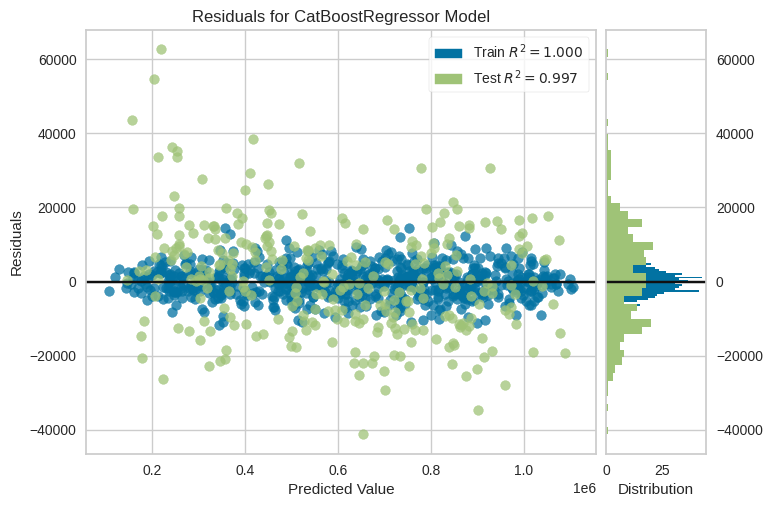

In [100]:
# plot residuals
plot_model(best, plot = 'residuals')

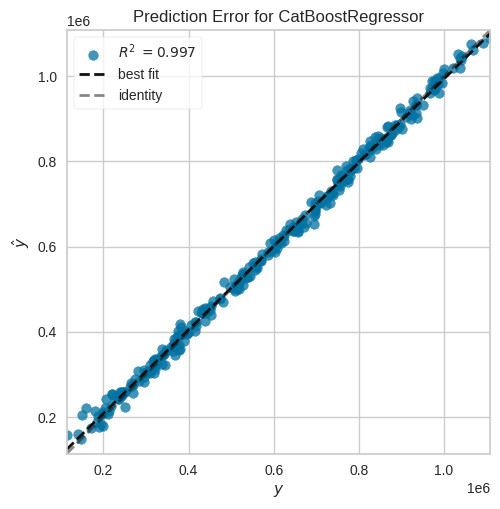

In [101]:
# plot error
plot_model(best, plot = 'error')

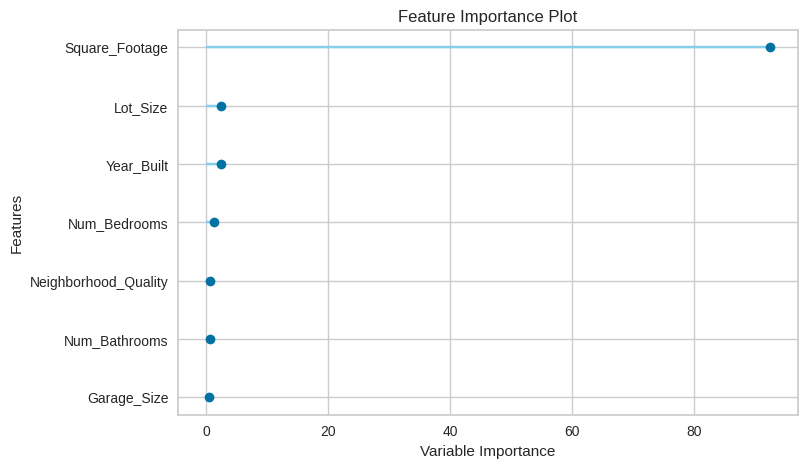

In [102]:
# plot feature importance
plot_model(best, plot = 'feature')

In [103]:
# check docstring to see available plots
# help(plot_model)

In [104]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [105]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,11567.2556,214800240.2828,14656.0650,0.9966,0.0476,0.0277


In [106]:
# show predictions df
holdout_pred.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,prediction_label
131,4913,1,1,1972,1.177737,1,4,977158.5625,968500.933688
203,2755,2,2,1979,4.386386,1,4,616308.9375,608620.826376
50,2455,3,2,1953,4.951480,0,10,527393.5000,540965.991773
585,3919,4,2,2012,1.740908,2,3,875382.7500,863756.705626
138,3804,3,1,1996,3.335180,2,6,832386.3125,834072.561672


In [107]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('House_Price', axis=1, inplace=True)
new_data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8


In [108]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,prediction_label
0,1360,2,1,1981,0.599637,0,5,2.637482e+05
1,4272,3,3,2016,4.753014,1,6,9.854896e+05
2,3592,1,2,2016,3.634823,0,9,7.791533e+05
3,966,1,2,1977,2.730667,1,8,2.248700e+05
4,4926,2,1,1993,4.699072,0,8,1.047882e+06


In [109]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Square_Footage', 'Num_Bedrooms',
                                              'Num_Bathrooms', 'Year_Built',
                                              'Lot_Size', 'Garage_Size',
                                              'Neighborhood_Quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7bd7189209d0>)]),
 'my_first_pipeline.pkl')

In [110]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Square_Footage', 'Num_Bedrooms',
                                             'Num_Bathrooms', 'Year_Built',
                                             'Lot_Size', 'Garage_Size',
                                             'Neighborhood_Quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7bd7c7ef0c10>)])

In [111]:
s = setup(data, target = 'House_Price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,House_Price
2,Target type,Regression
3,Original data shape,"(1000, 8)"
4,Transformed data shape,"(1000, 8)"
5,Transformed train set shape,"(700, 8)"
6,Transformed test set shape,"(300, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [112]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [113]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
498,955.0,3.0,1.0,2015.0,3.727043,1.0,2.0
243,725.0,2.0,1.0,1980.0,1.608287,2.0,6.0
314,2991.0,1.0,3.0,1996.0,2.137143,2.0,10.0
202,2182.0,3.0,3.0,1953.0,2.130941,2.0,5.0
300,3201.0,1.0,1.0,1978.0,3.277485,0.0,5.0
...,...,...,...,...,...,...,...
988,4991.0,1.0,2.0,1982.0,4.249420,2.0,6.0
322,4864.0,2.0,2.0,1997.0,1.068604,2.0,2.0
382,4246.0,5.0,1.0,2014.0,1.694165,2.0,6.0
365,2570.0,5.0,3.0,1962.0,4.522933,2.0,10.0


In [114]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [115]:
# help(setup)

In [116]:
# init setup with normalize = True
s = setup(data, target = 'House_Price', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,House_Price
2,Target type,Regression
3,Original data shape,"(1000, 8)"
4,Transformed data shape,"(1000, 8)"
5,Transformed train set shape,"(700, 8)"
6,Transformed test set shape,"(300, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


<Axes: >

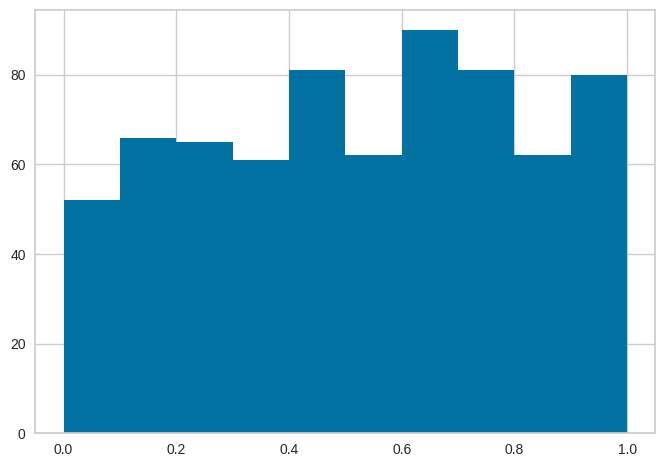

In [117]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Square_Footage'].hist()

<Axes: >

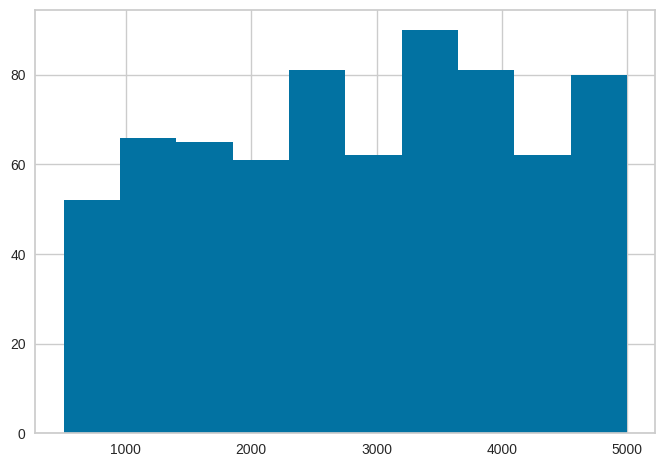

In [118]:
get_config('X_train')['Square_Footage'].hist()

In [119]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,7668.9659,93204495.2960,9608.5111,0.9985,0.0226,0.0153,0.0600
lasso,Lasso Regression,7668.8809,93200099.7548,9608.3013,0.9985,0.0226,0.0153,0.0530
lar,Least Angle Regression,7668.9659,93204495.2960,9608.5111,0.9985,0.0226,0.0153,0.0620
llar,Lasso Least Angle Regression,7668.8803,93200062.5551,9608.2990,0.9985,0.0226,0.0153,0.0660
ridge,Ridge Regression,8597.7174,118803578.1710,10861.7475,0.9981,0.0264,0.0178,0.0810
huber,Huber Regressor,8908.5208,127009067.7439,11232.4230,0.9980,0.0273,0.0185,0.0430
catboost,CatBoost Regressor,10728.4296,191064968.8600,13769.5722,0.9970,0.0344,0.0225,1.4420
gbr,Gradient Boosting Regressor,12972.9108,263880817.8003,16219.6343,0.9958,0.0381,0.0262,0.2430
lightgbm,Light Gradient Boosting Machine,13239.9031,274799728.2198,16528.6813,0.9957,0.0394,0.0266,0.8350
xgboost,Extreme Gradient Boosting,15457.0670,379683481.6000,19455.1469,0.9940,0.0439,0.0309,0.1200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [120]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [121]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,10728.4296,191064968.8600,13769.5722,0.9970,0.0344,0.0225,1.5310
gbr,Gradient Boosting Regressor,12972.9108,263880817.8003,16219.6343,0.9958,0.0381,0.0262,0.1520
lightgbm,Light Gradient Boosting Machine,13239.9031,274799728.2198,16528.6813,0.9957,0.0394,0.0266,0.6180
xgboost,Extreme Gradient Boosting,15457.0670,379683481.6000,19455.1469,0.9940,0.0439,0.0309,0.1250
et,Extra Trees Regressor,15923.9871,391651592.6821,19699.4539,0.9937,0.0447,0.0317,0.2620
rf,Random Forest Regressor,17391.8573,481179745.4414,21860.6567,0.9923,0.0503,0.0348,0.3760
dt,Decision Tree Regressor,26032.5836,1050519074.9392,32360.7322,0.9833,0.0720,0.0504,0.0630


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [122]:
compare_tree_models

In [123]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,10728.4296,1.910650e+08,13769.5722,0.9970,0.0344,0.0225,1.531
gbr,Gradient Boosting Regressor,12972.9108,2.638808e+08,16219.6343,0.9958,0.0381,0.0262,0.152
lightgbm,Light Gradient Boosting Machine,13239.9031,2.747997e+08,16528.6813,0.9957,0.0394,0.0266,0.618
xgboost,Extreme Gradient Boosting,15457.0670,3.796835e+08,19455.1469,0.9940,0.0439,0.0309,0.125
et,Extra Trees Regressor,15923.9871,3.916516e+08,19699.4539,0.9937,0.0447,0.0317,0.262
rf,Random Forest Regressor,17391.8573,4.811797e+08,21860.6567,0.9923,0.0503,0.0348,0.376
dt,Decision Tree Regressor,26032.5836,1.050519e+09,32360.7322,0.9833,0.0720,0.0504,0.063


In [124]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,7668.8803,93200062.5551,9608.2990,0.9985,0.0226,0.0153,0.0350
lasso,Lasso Regression,7668.8809,93200099.7548,9608.3013,0.9985,0.0226,0.0153,0.0320
lr,Linear Regression,7668.9659,93204495.2960,9608.5111,0.9985,0.0226,0.0153,0.0830
lar,Least Angle Regression,7668.9659,93204495.2960,9608.5111,0.9985,0.0226,0.0153,0.0350
ridge,Ridge Regression,8597.7174,118803578.1710,10861.7475,0.9981,0.0264,0.0178,0.0320
huber,Huber Regressor,8908.5208,127009067.7439,11232.4230,0.9980,0.0273,0.0185,0.0790
catboost,CatBoost Regressor,10728.4296,191064968.8600,13769.5722,0.9970,0.0344,0.0225,1.6750
gbr,Gradient Boosting Regressor,12972.9108,263880817.8003,16219.6343,0.9958,0.0381,0.0262,0.2330
lightgbm,Light Gradient Boosting Machine,13239.9031,274799728.2198,16528.6813,0.9957,0.0394,0.0266,0.7660
xgboost,Extreme Gradient Boosting,15457.0670,379683481.6000,19455.1469,0.9940,0.0439,0.0309,0.2260


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [125]:
# list of top 3 models by MAE
best_mae_models_top3

[LassoLars(random_state=123),
 Lasso(random_state=123),
 LinearRegression(n_jobs=-1)]

In [126]:
# help(compare_models)

In [127]:
# from pycaret.regression import *
# s = setup(data, target = 'House_Price', log_experiment='mlflow', experiment_name='insurance_experiment')

In [128]:
# compare models
# best = compare_models()

In [129]:
# start mlflow server on localhost:5000
# !mlflow ui

In [130]:
# help(setup)

In [131]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [132]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7978.9630,99038341.7038,9951.8009,0.9982,0.0194,0.0143
1,8927.0684,107459698.6648,10366.2770,0.9985,0.0262,0.0190
2,7521.0493,89686222.0042,9470.2810,0.9986,0.0247,0.0165
3,8158.2943,103415802.8643,10169.3561,0.9984,0.0276,0.0164
4,7156.3731,81338813.0478,9018.8033,0.9986,0.0240,0.0144
5,6496.4119,71306531.3303,8444.3195,0.9986,0.0195,0.0130
6,7365.1201,87617891.9891,9360.4429,0.9985,0.0183,0.0136
7,8955.6648,129402085.5658,11375.5037,0.9981,0.0250,0.0175
8,6479.7048,63163096.6308,7947.5214,0.9991,0.0203,0.0134


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [133]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7978.9630,9.903834e+07,9951.8009,0.9982,0.0194,0.0143
1,8927.0684,1.074597e+08,10366.2770,0.9985,0.0262,0.0190
2,7521.0493,8.968622e+07,9470.2810,0.9986,0.0247,0.0165
3,8158.2943,1.034158e+08,10169.3561,0.9984,0.0276,0.0164
4,7156.3731,8.133881e+07,9018.8033,0.9986,0.0240,0.0144
5,6496.4119,7.130653e+07,8444.3195,0.9986,0.0195,0.0130
6,7365.1201,8.761789e+07,9360.4429,0.9985,0.0183,0.0136
7,8955.6648,1.294021e+08,11375.5037,0.9981,0.0250,0.0175
8,6479.7048,6.316310e+07,7947.5214,0.9991,0.0203,0.0134


In [134]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8064.0559,96440677.8303,9820.4215,0.9985,0.0227,0.0161
1,7328.4908,87718557.7106,9365.8186,0.9985,0.0236,0.0148
2,7645.7434,96630156.3918,9830.0639,0.9986,0.0214,0.0150
Mean,7679.4300,93596463.9776,9672.1013,0.9985,0.0226,0.0153
Std,301.2364,4157027.1504,216.6104,0.0000,0.0009,0.0006


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [135]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11079.4286,201035166.4290,14178.6870,0.9964,0.0356,0.0218
1,11531.3557,228590263.8487,15119.2018,0.9967,0.0434,0.0254
2,13314.3280,274068739.1344,16555.0216,0.9959,0.0602,0.0333
3,12789.6096,253251273.3837,15913.8705,0.9962,0.0614,0.0270
4,12800.3069,272856755.6102,16518.3763,0.9952,0.0846,0.0312
5,11932.0265,228706922.5483,15123.0593,0.9955,0.0437,0.0264
6,12979.5598,262556817.9866,16203.6051,0.9956,0.0391,0.0251
7,13474.6968,315093193.0262,17750.8646,0.9954,0.0425,0.0278
8,11804.6637,219952509.8839,14830.7960,0.9968,0.0507,0.0281


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [136]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [137]:
# help(create_model)

In [138]:
# train a dt model with default params
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27587.2424,1101256236.2302,33185.1810,0.9805,0.0629,0.0491
1,26362.4701,1011375801.3619,31802.1352,0.9856,0.0673,0.0502
2,27070.5619,985429525.8350,31391.5518,0.9851,0.1006,0.0620
3,28665.6844,1169586729.5040,34199.2212,0.9822,0.0729,0.0534
4,21754.6632,845132636.1060,29071.1650,0.9851,0.0605,0.0410
5,29244.5533,1291326213.2054,35935.0277,0.9747,0.0681,0.0546
6,23028.2790,923451658.3172,30388.3474,0.9846,0.0553,0.0400
7,25718.1045,1043646183.9836,32305.5132,0.9848,0.0807,0.0488
8,26201.3565,1075625730.8839,32796.7335,0.9842,0.0789,0.0533


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [139]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27653.3729,1132540675.5565,33653.2417,0.9799,0.0613,0.0486
1,24595.4249,961328585.2142,31005.2993,0.9863,0.0775,0.0520
2,24992.4559,964718111.2038,31059.9116,0.9854,0.0824,0.0553
3,25508.9264,922356613.7666,30370.3246,0.9860,0.0710,0.0506
4,25662.4878,1055820940.5785,32493.3984,0.9813,0.0784,0.0516
5,26240.2518,1085308725.9392,32944.0241,0.9788,0.0663,0.0505
6,23606.5306,914116886.8967,30234.3660,0.9848,0.0523,0.0403
7,23206.4522,846265159.0348,29090.6370,0.9877,0.0614,0.0429
8,24981.3060,1013619858.2755,31837.3972,0.9851,0.0685,0.0471


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [140]:
dt

DecisionTreeRegressor(random_state=123)

In [141]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26753.8654,1089119809.8574,33001.8153,0.9807,0.0629,0.0491
1,24548.3878,893155645.6284,29885.7097,0.9872,0.0690,0.0496
2,27380.5789,1033041215.4517,32140.9585,0.9844,0.0991,0.0623
3,23380.6578,835051472.3400,28897.2572,0.9873,0.0669,0.0457
4,21357.1001,895934305.7364,29932.1617,0.9842,0.0628,0.0407
5,28253.6824,1232138665.9993,35101.8328,0.9759,0.0753,0.0556
6,24599.2276,985651871.9643,31395.0931,0.9836,0.0547,0.0423
7,25090.1358,940501074.7140,30667.5900,0.9863,0.0785,0.0479
8,24084.2170,945471929.9152,30748.5273,0.9861,0.0769,0.0495


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [142]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27653.3729,1132540675.5565,33653.2417,0.9799,0.0613,0.0486
1,24595.4249,961328585.2142,31005.2993,0.9863,0.0775,0.0520
2,24992.4559,964718111.2038,31059.9116,0.9854,0.0824,0.0553
3,25508.9264,922356613.7666,30370.3246,0.9860,0.0710,0.0506
4,25662.4878,1055820940.5785,32493.3984,0.9813,0.0784,0.0516
5,26240.2518,1085308725.9392,32944.0241,0.9788,0.0663,0.0505
6,23606.5306,914116886.8967,30234.3660,0.9848,0.0523,0.0403
7,23206.4522,846265159.0348,29090.6370,0.9877,0.0614,0.0429
8,24981.3060,1013619858.2755,31837.3972,0.9851,0.0685,0.0471


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [143]:
# model object
tuned_dt

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, random_state=123)

In [144]:
# tuner object
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Square_Footage',
                                                                          'Num_Bedrooms',
                                                                          'Num_Bathrooms',
                                                                          'Year_Built',
                                                                          'Lot_Size',
                                                                          'Garage_Size',
                                                                          'Neighborhood_Quality'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              Transforme...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123, refit=False, scoring='r2', verbose=1)

In [145]:
# tune dt using optuna
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,27126.0800,1144814314.6494,33835.1048,0.9797,0.0661,0.0492
1,24914.5649,900094748.7165,30001.5791,0.9871,0.0709,0.0511
2,25875.7622,1000965773.1002,31638.0431,0.9849,0.0886,0.0621
3,27501.7960,1448977430.0552,38065.4362,0.9780,0.0975,0.0539
4,21750.8825,735279858.3580,27116.0443,0.9870,0.0710,0.0458
5,24515.5698,943020414.0057,30708.6374,0.9815,0.0669,0.0472
6,22501.7395,790600536.7397,28117.6197,0.9869,0.0559,0.0414
7,27438.1005,1186631919.9222,34447.5241,0.9827,0.0728,0.0540
8,27428.6532,1220558054.2803,34936.4860,0.9821,0.0860,0.0577


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 700 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


In [146]:
# help(tune_model)

In [147]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20649.4713,660613369.6020,25702.4001,0.9883,0.0477,0.0369
1,18324.0295,498576834.1103,22328.8341,0.9929,0.0448,0.0350
2,19822.4732,596462018.7484,24422.5719,0.9910,0.0624,0.0446
3,21329.9937,677610329.9332,26030.9495,0.9897,0.0655,0.0422
4,19488.5125,546865879.1335,23385.1637,0.9903,0.0622,0.0411
5,19144.7843,595689828.5542,24406.7578,0.9883,0.0457,0.0352
6,17295.3972,489419815.0709,22122.8347,0.9919,0.0432,0.0318
7,17634.1951,520528216.4850,22815.0875,0.9924,0.0487,0.0346
8,15641.8977,378623823.6953,19458.2585,0.9944,0.0551,0.0338


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

In [148]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20930.6165,693110961.9873,26327.0006,0.9877,0.0474,0.0369
1,21042.1636,610038151.2539,24698.9504,0.9913,0.0629,0.0447
2,20748.8627,630752114.4968,25114.7788,0.9905,0.0585,0.0432
3,19694.4905,629377108.6054,25087.3894,0.9904,0.0540,0.0374
4,19102.2297,567896659.0398,23830.5824,0.9900,0.0618,0.0381
5,20196.7915,710668042.4213,26658.3578,0.9861,0.0518,0.0378
6,19545.2076,623382135.5274,24967.6217,0.9896,0.0457,0.0348
7,18925.2000,548681700.4150,23423.9557,0.9920,0.0498,0.0369
8,18243.9123,530677512.7800,23036.4388,0.9922,0.0695,0.0412


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

In [149]:
# help(ensemble_model)

In [150]:
# top 3 models based on mae
best_mae_models_top3

[LassoLars(random_state=123),
 Lasso(random_state=123),
 LinearRegression(n_jobs=-1)]

In [151]:
# blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7979.6099,99038199.3150,9951.7938,0.9982,0.0194,0.0143
1,8927.1610,107453646.5925,10365.9851,0.9985,0.0262,0.0190
2,7521.1942,89687965.1540,9470.3730,0.9986,0.0247,0.0165
3,8158.1125,103415678.3615,10169.3499,0.9984,0.0276,0.0164
4,7155.4228,81318783.4548,9017.6928,0.9986,0.0240,0.0144
5,6496.6976,71315794.7748,8444.8680,0.9986,0.0195,0.0130
6,7363.8945,87612482.3140,9360.1540,0.9985,0.0183,0.0136
7,8955.8441,129401053.0512,11375.4584,0.9981,0.0250,0.0175
8,6480.3547,63169789.5261,7947.9425,0.9991,0.0203,0.0134


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingRegressor(estimators=[('Lasso Least Angle Regression',
                             LassoLars(random_state=123)),
                            ('Lasso Regression', Lasso(random_state=123)),
                            ('Linear Regression', LinearRegression(n_jobs=-1))],
                n_jobs=-1)

In [152]:
# help(blend_models)

In [153]:
# stack models
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8008.3652,99400679.2296,9969.9889,0.9982,0.0193,0.0143
1,8929.7121,107480303.2288,10367.2708,0.9985,0.0263,0.0190
2,7513.8475,89219433.8212,9445.6039,0.9987,0.0245,0.0165
3,8159.6747,103802368.5882,10188.3447,0.9984,0.0275,0.0164
4,7165.9591,81011911.9546,9000.6618,0.9986,0.0239,0.0145
5,6518.0665,72125531.3099,8492.6752,0.9986,0.0192,0.0129
6,7341.3271,87363700.5530,9346.8551,0.9985,0.0185,0.0137
7,8953.5456,129288915.6420,11370.5284,0.9981,0.0250,0.0175
8,6475.6248,62841308.8892,7927.2510,0.9991,0.0199,0.0133


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Lasso Least Angle Regression',
                               LassoLars(random_state=123)),
                              ('Lasso Regression', Lasso(random_state=123)),
                              ('Linear Regression',
                               LinearRegression(n_jobs=-1))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [154]:
# help(stack_models)

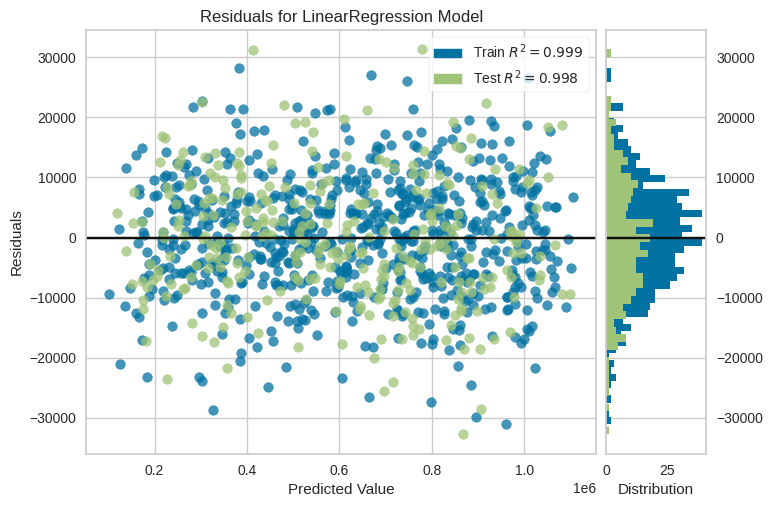

In [155]:
# plot residuals
plot_model(best, plot = 'residuals')

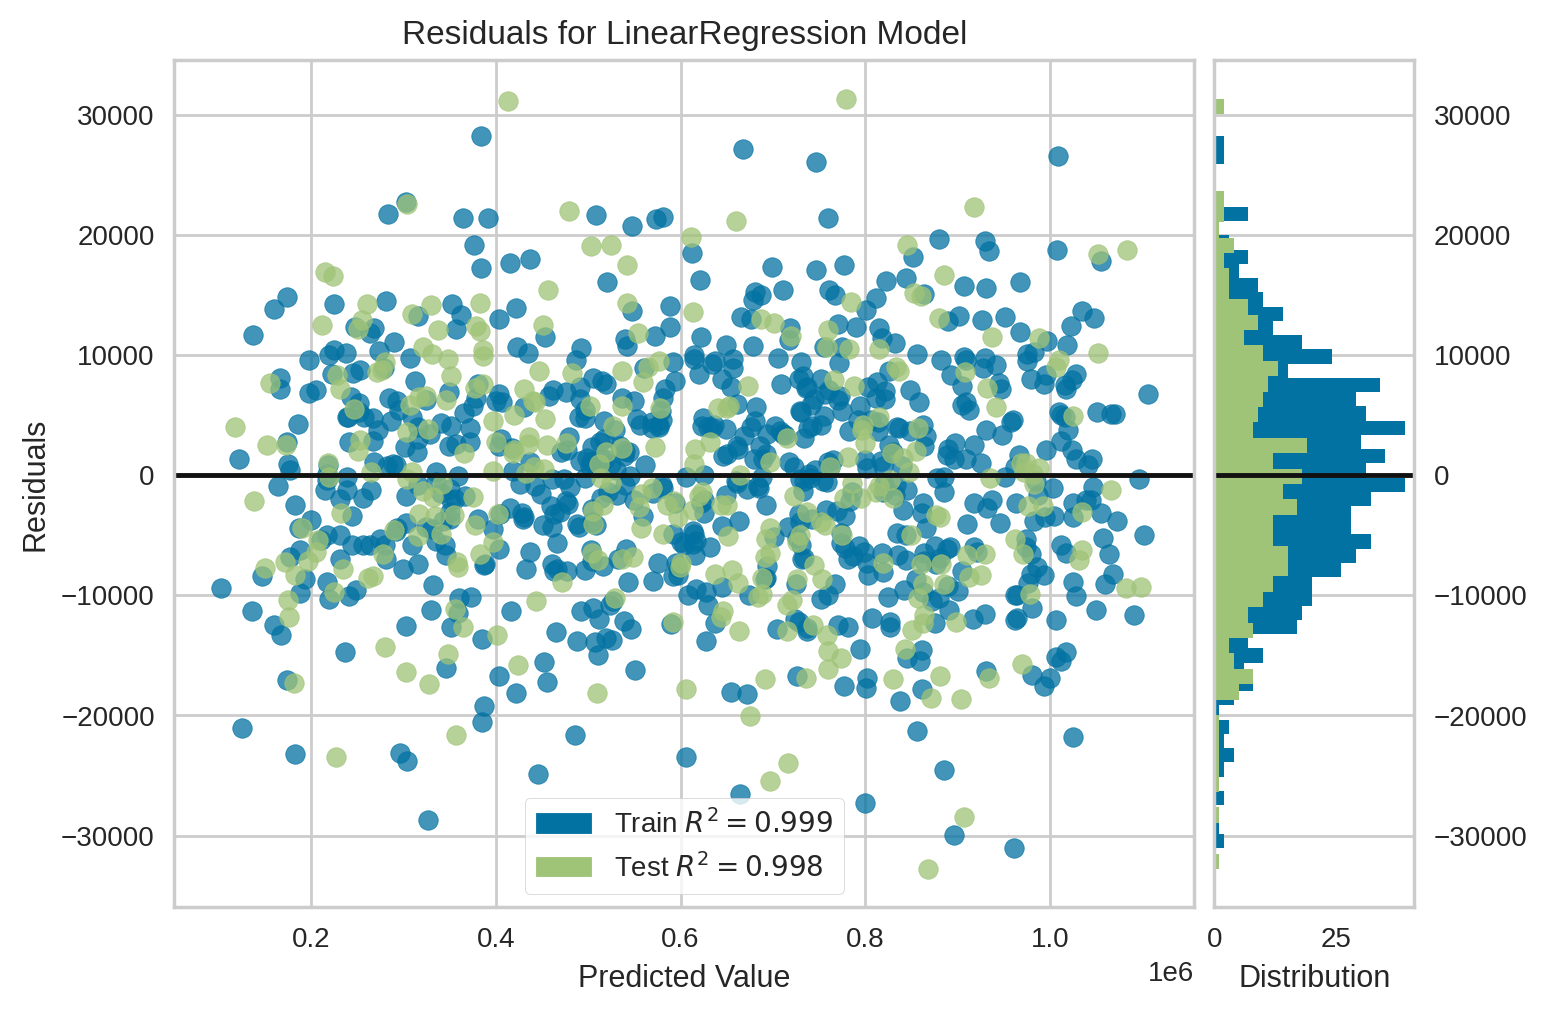

In [156]:
# to control the scale of plot
plot_model(best, plot = 'residuals', scale = 2)

In [157]:
# to save the plot
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

In [158]:
# help(plot_model)

In [159]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11923.7888,231782396.3063,15224.4013,0.9959,0.0248,0.0198
1,13098.2217,267874636.5839,16366.8762,0.9962,0.0390,0.0262
2,15322.4490,339276603.8592,18419.4626,0.9949,0.0432,0.0318
3,14358.2797,348312172.0460,18663.1233,0.9947,0.0547,0.0307
4,13179.6147,255482997.3453,15983.8355,0.9955,0.0474,0.0293
5,12635.0756,259246622.9228,16101.1373,0.9949,0.0296,0.0227
6,11268.6999,205598870.3816,14338.7193,0.9966,0.0286,0.0211
7,13220.2572,268537132.9110,16387.1026,0.9961,0.0389,0.0266
8,14306.7108,304349141.3278,17445.6052,0.9955,0.0575,0.0333


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

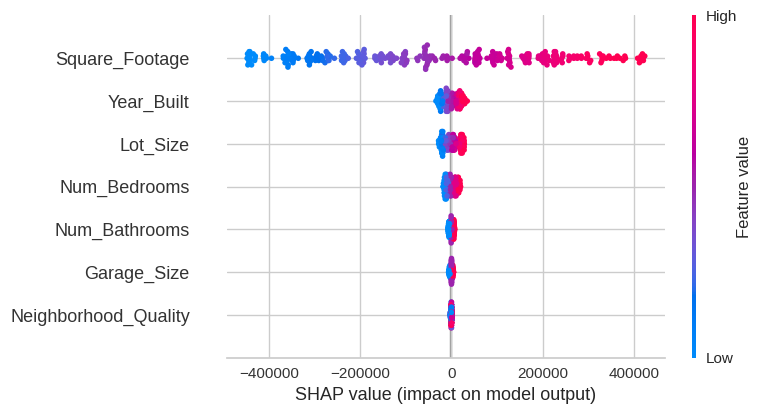

In [160]:
# interpret summary model
interpret_model(lightgbm, plot = 'summary')

In [161]:
# reason plot for test set observation 1
interpret_model(lightgbm, plot = 'reason', observation = 1)

In [162]:
# help(interpret_model)

In [163]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/66 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['Square_Footage',...",7668.9659,9.320450e+07,9608.5111,0.9985,0.0226,0.0153
1,Lasso Regression,"(TransformerWrapper(include=['Square_Footage',...",7668.8809,9.320010e+07,9608.3013,0.9985,0.0226,0.0153
2,Ridge Regression,"(TransformerWrapper(include=['Square_Footage',...",8597.7174,1.188036e+08,10861.7475,0.9981,0.0264,0.0178
3,Elastic Net,"(TransformerWrapper(include=['Square_Footage',...",187832.3769,4.814797e+10,219065.4545,0.2458,0.4446,0.4404
4,Least Angle Regression,"(TransformerWrapper(include=['Square_Footage',...",7668.9659,9.320450e+07,9608.5111,0.9985,0.0226,0.0153
...,...,...,...,...,...,...,...,...
60,Decision Tree Regressor,"(TransformerWrapper(include=['Square_Footage',...",18623.9929,5.401789e+08,23158.6943,0.9913,0.0522,0.0369
61,Decision Tree Regressor,"(TransformerWrapper(include=['Square_Footage',...",19568.5407,6.011950e+08,24476.3726,0.9904,0.0554,0.0387
62,Voting Regressor,"(TransformerWrapper(include=['Square_Footage',...",7668.9090,9.320154e+07,9608.3696,0.9985,0.0226,0.0153


In [164]:
# select the best model based on MAE
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Square_Footage', 'Num_Bedrooms',
                                             'Num_Bathrooms', 'Year_Built',
                                             'Lot_Size', 'Garage_Size',
                                             'Neighborhood_Quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ['trained_model', LassoLars(random_state=123)]])

In [165]:
# help(get_leaderboard)

In [166]:
# find best model based on CV metrics
automl()

LinearRegression(n_jobs=-1)

In [169]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://637fdf5072d5ec22eb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [170]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [171]:
# !python my_first_api.py

In [172]:
# check out the .py file created with this magic command
# %load my_first_api.py

In [173]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


In [174]:
# check out the DockerFile file created with this magic command
# %load DockerFile

In [175]:
# check out the requirements file created with this magic command
# %load requirements.txt

In [176]:
final_best = finalize_model(best)

In [177]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Square_Footage', 'Num_Bedrooms',
                                             'Num_Bathrooms', 'Year_Built',
                                             'Lot_Size', 'Garage_Size',
                                             'Neighborhood_Quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator', LinearRegression(n_jobs=-1))])

In [178]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double score(double[] input) {
        double var0;
        if (input[0] <= 0.502335399389267) {
            if (input[0] <= 0.26078736782073975) {
                if (input[0] <= 0.11065391451120377) {
                    if (input[0] <= 0.037477757781744) {
                        if (input[3] <= 0.5069444626569748) {
                            if (input[2] <= 0.25) {
                                if (input[6] <= 0.2222222276031971) {
                                    if (input[4] <= 0.3543972671031952) {
                                        var0 = 111626.8515625;
                                    } else {
                                        var0 = 126097.9296875;
                                    }
                                } else {
                                    if (input[0] <= 0.028580959886312485) {
                                        var0 = 147206.859375;
                                    } else {
          

In [179]:
# deploy model on aws s3
# deploy_model(best, model_name = 'my_first_platform_on_aws',
#             platform = 'aws', authentication = {'bucket' : 'pycaret-test'})

In [180]:
# load model from aws s3
# loaded_from_aws = load_model(model_name = 'my_first_platform_on_aws', platform = 'aws',
#                              authentication = {'bucket' : 'pycaret-test'})

# loaded_from_aws

In [181]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Square_Footage', 'Num_Bedrooms',
                                              'Num_Bathrooms', 'Year_Built',
                                              'Lot_Size', 'Garage_Size',
                                              'Neighborhood_Quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model', LinearRegression(n_jobs=-1))]),
 'my_first_model.pkl')

In [182]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Square_Footage', 'Num_Bedrooms',
                                             'Num_Bathrooms', 'Year_Built',
                                             'Lot_Size', 'Garage_Size',
                                             'Neighborhood_Quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])

In [183]:
# save experiment
save_experiment('my_experiment')

In [184]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,House_Price
2,Target type,Regression
3,Original data shape,"(1000, 8)"
4,Transformed data shape,"(1000, 8)"
5,Transformed train set shape,"(700, 8)"
6,Transformed test set shape,"(300, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple
